# Comparison of data


by soniame@iadb.org

- **IDB COVID Impact Dashboard**

Database: `spd_sdv_waze_corona.prod_daily_daily_index`


- **Google COVID-19 Mobility Report**

CSV: [Google link](https://www.google.com/covid19/mobility/)

Baseline: median value for the corresponding day of week during a 5 week period from January 3rd, 2020 to February 6th, 2020. 

- **Waze driven kilometers** driven kilometers percent change from baseline. 

CSV: [Waze link](https://www.waze.com/covid19)

Baseline: average value for the corresponding day of week during a 2 week period from February 11th, 2020 to February 25th, 2020.

In [2]:
# %load first_cell.py
%reload_ext autoreload
%autoreload 2
from pathlib import Path
home = str(Path.home())

import sys
sys.path = sys.path + [f'{home}/.conda/envs/norm_env/lib/python37.zip', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7/lib-dynload', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7/site-packages']
sys.prefix = '/home/soniame/.conda/envs/norm_env'

from paths import RAW_PATH, TREAT_PATH, OUTPUT_PATH, FIGURES_PATH

from copy import deepcopy
import numpy as np
import pandas as pd
pd.options.display.max_columns = 999
import yaml
import matplotlib.pyplot as plt 
import datetime

import warnings
warnings.filterwarnings('ignore')

# Plotting
import plotly
import plotly.graph_objs as go
import cufflinks as cf
plotly.offline.init_notebook_mode(connected=True)

def iplottitle(title, width=40):
    return '<br>'.join(textwrap.wrap(title, width))
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

import plotnine as p9
from mizani.breaks import date_breaks
from mizani.formatters import date_format
p9.theme_set(p9.theme_linedraw()) # default theme

# Setting cufflinks
import textwrap
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import yaml
from jinja2 import Template
cf.themes.THEMES['custom'] = yaml.load(open('cufflinks_template.yaml', 'r'))

# Manipulation 
from siuba import *

In [3]:
from src import utils
conn = utils.connect_athena(path='../configs/athena.yaml')

In [4]:
iso_codes = pd.read_sql_query("""
select 
    distinct country_iso_code, country_name
from spd_sdv_waze_corona.prod_daily_daily_index
""", conn)

In [5]:
len(iso_codes.country_iso_code.to_list())

20

In [6]:
iso_codes.sort_values('country_iso_code')

,country_iso_code,country_name
3,AR,Argentina
8,BB,Barbados
12,BO,Bolivia
14,BR,Brazil
15,CL,Chile
0,CO,Colombia
7,CR,Costa Rica
10,DO,Dominican Republic
2,EC,Ecuador
4,GT,Guatemala


## Country level

### Load data (country level)

Loading data per country. 

#### Waze dashboard

In [7]:
df_dash = pd.read_sql_query("""
select 
    *,
    (date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e')) as date
from spd_sdv_waze_corona.prod_daily_daily_index
where region_type = 'country';
""", conn)
# Bolivia

In [8]:
tab = (df_dash 
 >> group_by('country_iso_code', 'country_name', 'region_slug')
 >> summarize(min_date = _.date.min(),
             max_date = _.date.max(),
             n_obs = _.date.count())
 >> ungroup()
)
#tab.to_csv('~/private/projects/google_mob_country_list.csv')
tab

,country_iso_code,country_name,region_slug,min_date,max_date,n_obs
0,AR,Argentina,country_argentina,2020-03-09,2021-05-13,431
1,BB,Barbados,country_barbados,2020-03-09,2021-05-13,431
2,BR,Brazil,country_brazil,2020-03-09,2021-05-13,431
3,CL,Chile,country_chile,2020-03-09,2021-05-13,431
4,CO,Colombia,country_colombia,2020-03-09,2021-05-13,431
5,CR,Costa Rica,country_costa_rica,2020-03-09,2021-05-13,431
6,DO,Dominican Republic,country_dominican_republic,2020-03-09,2021-05-13,431
7,EC,Ecuador,country_ecuador,2020-03-09,2021-05-13,431
8,GT,Guatemala,country_guatemala,2020-03-09,2021-05-13,431
9,HN,Honduras,country_honduras,2020-03-09,2021-05-13,431


In [9]:
print(len(iso_codes.country_iso_code.to_list()))
#df_dash.head()
print(len(df_dash.country_iso_code.unique())) # Bolivia is missing
df_dash.sort_values('country_iso_code').country_iso_code.unique()

20
19


array(['AR', 'BB', 'BR', 'CL', 'CO', 'CR', 'DO', 'EC', 'GT', 'HN', 'JM',
       'MX', 'NI', 'PA', 'PE', 'PY', 'SV', 'TT', 'UY'], dtype=object)

In [10]:
len(df_dash.country_name.unique())
df_dash.country_name.unique()

array(['Colombia', 'Brazil', 'Argentina', 'Mexico', 'Chile', 'Peru',
       'Ecuador', 'Trinidad and Tobago', 'Costa Rica', 'Guatemala',
       'Paraguay', 'Jamaica', 'Panama', 'Nicaragua', 'Uruguay',
       'Honduras', 'Barbados', 'Dominican Republic', 'El Salvador'],
      dtype=object)

In [11]:
#df_dash.columns.tolist()
print(df_dash.shape)
df_dash.head(2)

(8189, 20)


,last_updated_utc,region_slug,region_name,country_name,country_iso_code,country_idb_code,region_type,population,timezone,year,month,day,dow,observed,expected_2020,ratio_20,tcp,dashboard,region_shapefile_wkt,date
0,2021-05-14 11:03:42.875,country_colombia,Colombia,Colombia,CO,CO,country,50882884,America/Bogota,2021,1,5,2,201977676,289642173.0,0.697335,-30.266482,TRUE,MULTIPOLYGON (((-77.9335716614437 7.2495846233...,2021-01-05
1,2021-05-14 11:03:42.875,country_colombia,Colombia,Colombia,CO,CO,country,50882884,America/Bogota,2021,2,16,2,236888818,289642173.0,0.817867,-18.213285,TRUE,MULTIPOLYGON (((-77.9335716614437 7.2495846233...,2021-02-16


#### Dasboard fixed

In [ ]:
#df_max = pd.read_csv("/home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/daily/daily_daily_index_max.csv")
#df_max['exists'] = df_max.region_slug.isin(df_dash.region_slug.unique().tolist()) 
#df_max['date'] = df_max.date.apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d'))
#df_max = df_max.siu_filter(_.exists)

In [ ]:
#df_max.dtypes
#df_max.head()

#### Waze driven km

In [57]:
df_waze = pd.read_csv("/home/soniame/shared/spd-sdv-omitnik-waze/corona/mobility/Waze _ COVID-19 Impact Dashboard_Country-Level Data_Table.csv")
df_waze.columns = ['date', 'country', 'pc_driven_miles']
df_waze.head(3)

,date,country,pc_driven_miles
0,"May 8, 2021",Austria,-0.74
1,"May 8, 2021",Ecuador,-0.59
2,"May 8, 2021",Argentina,-0.55


In [58]:
df_waze['date'] = df_waze.date.apply(lambda x : datetime.datetime.strptime(x, '%b %d, %Y'))
df_waze['exists'] = df_waze.country.isin([ 'Argentina','Brazil', 'Chile', 'Colombia', 'Costa Rica',  
                                          'Ecuador', 'Guatemala',  'Mexico',  'Peru', 'Uruguay']) 
df_waze = df_waze.siu_filter(_.exists).siu_mutate(pc_driven_miles=100*(_.pc_driven_miles + 1 ))      
print(df_waze.shape)
df_waze.head()

(4340, 4)


,date,country,pc_driven_miles,exists
1,2021-05-08,Ecuador,41.0,True
2,2021-05-08,Argentina,45.0,True
4,2021-05-08,Uruguay,51.0,True
9,2021-05-08,Costa Rica,66.0,True
10,2021-05-08,Chile,71.0,True


Missing countries: Panama, Honduras, Trinidad and Tobago, Dominican Republic, Paraguay, Barbados, El Salvador, Jamaica, Nicaragua

In [59]:
tab = (df_waze 
 >> group_by('country')
 >> summarize(min_date = _.date.min(),
             max_date = _.date.max(),
             n_obs = _.date.count())
 >> ungroup()
)
#tab.to_csv('~/private/projects/google_mob_country_list.csv')
tab

,country,min_date,max_date,n_obs
0,Argentina,2020-03-01,2021-05-08,434
1,Brazil,2020-03-01,2021-05-08,434
2,Chile,2020-03-01,2021-05-08,434
3,Colombia,2020-03-01,2021-05-08,434
4,Costa Rica,2020-03-01,2021-05-08,434
5,Ecuador,2020-03-01,2021-05-08,434
6,Guatemala,2020-03-01,2021-05-08,434
7,Mexico,2020-03-01,2021-05-08,434
8,Peru,2020-03-01,2021-05-08,434
9,Uruguay,2020-03-01,2021-05-08,434


In [60]:
print('Countries: ' + str(len(df_waze.country.unique())) )
df_waze.country.unique()

Countries: 10


array(['Ecuador', 'Argentina', 'Uruguay', 'Costa Rica', 'Chile',
       'Colombia', 'Mexico', 'Brazil', 'Peru', 'Guatemala'], dtype=object)

Turn baseline from 2020-03-02 to 2020-03-08 per day of week

In [61]:
df_waze = df_waze \
              .siu_select('country', 'date', 
                          'pc_driven_miles')
df_waze['dow'] = df_waze.date.apply(lambda x : datetime.datetime.strftime(x, '%w'))  
df_waze.head(2)

,country,date,pc_driven_miles,dow
1,Ecuador,2021-05-08,41.0,6
2,Argentina,2021-05-08,45.0,6


In [62]:
df_waze_base = df_waze[(df_waze.date >= '2020-03-02') & (df_waze.date <= '2020-03-08')] \
    .drop('date', 1) \
    .rename(columns = {'pc_driven_miles':'pc_driven_miles_baseline'})
df_waze_base.head(2)

,country,pc_driven_miles_baseline,dow
18872,Chile,65.0,0
18875,Argentina,84.0,0


In [63]:
df_waze_rebase = df_waze.merge(df_waze_base)
df_waze_rebase['pc_driven_miles'] = 100*(df_waze_rebase['pc_driven_miles']- df_waze_rebase['pc_driven_miles_baseline'])/df_waze_rebase['pc_driven_miles_baseline']
df_waze_rebase.head()
df_waze = df_waze_rebase.drop(['pc_driven_miles_baseline'], 1)

In [64]:
gg1 = (p9.ggplot(df_waze_rebase, 
           p9.aes(x='dow', y ='pc_driven_miles_baseline')) 
 + p9.geom_point()
 + p9.facet_wrap('country', scales='free_y') 
 + p9.labs(title='Driven miles per country for base period')
 + p9.theme(figure_size = (11, 11),
            axis_text_x=p9.element_text(rotation=90, hjust=1), 
            legend_position='top')
) 
gg2 = (p9.ggplot(df_waze, 
           p9.aes(x='date', y ='pc_driven_miles', color = 'dow')) 
 + p9.geom_point()
 + p9.facet_wrap('country', scales='free_y') 
 + p9.labs(title='Driven miles per country')
 + p9.theme(figure_size = (11, 11),
            axis_text_x=p9.element_text(rotation=90, hjust=1), 
            legend_position='top')
) 

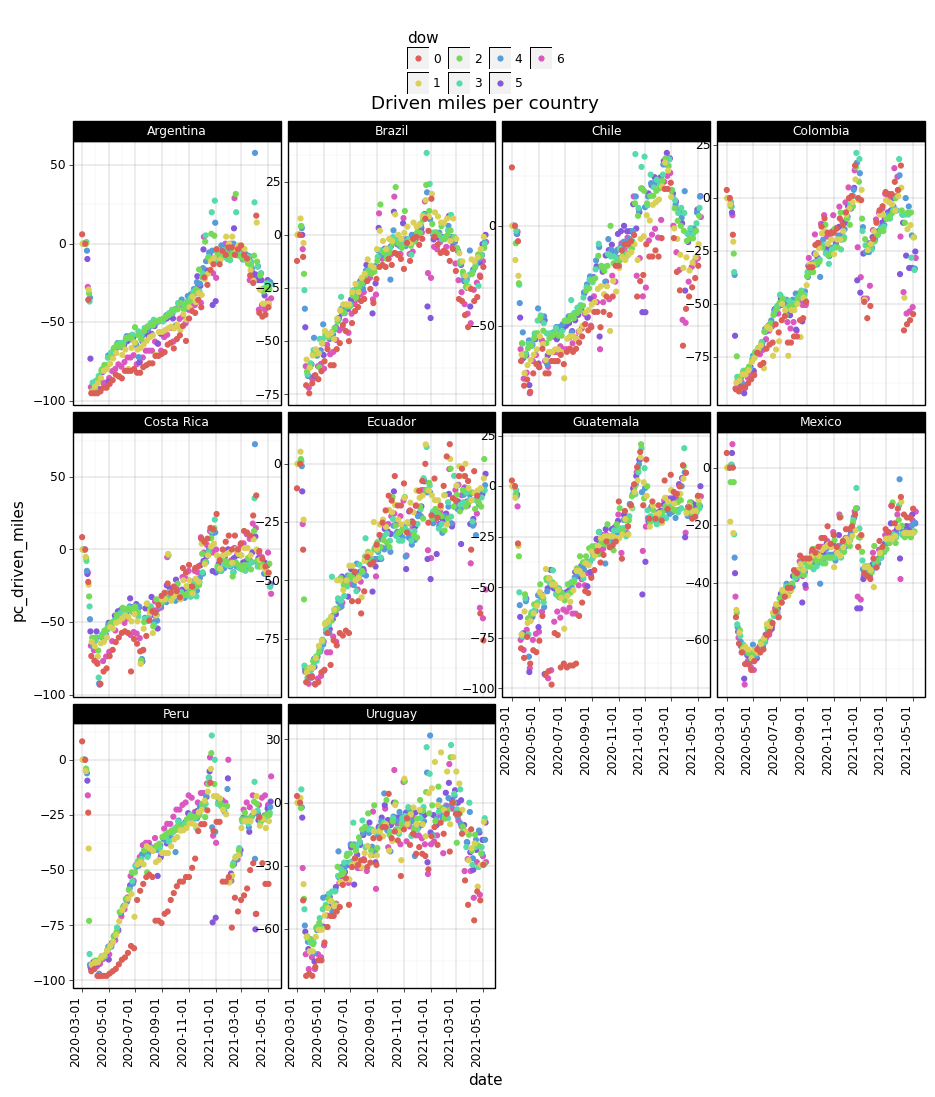

<ggplot: (8772794719877)>

In [65]:
gg2

In [66]:
df_waze.head(2)

,country,date,pc_driven_miles,dow
0,Ecuador,2021-05-08,-53.932584,6
1,Ecuador,2021-05-01,-66.292135,6


#### Google mobility

In [67]:
df_goo = pd.read_csv("~/shared/spd-sdv-omitnik-waze/corona/mobility/Global_Mobility_Report.csv")  
df_goo['inregion'] = df_goo.country_region_code.isin(iso_codes.country_iso_code.to_list())
df_goo['date'] = df_goo.date.apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d'))
df_goo = df_goo \
    .siu_filter(_.inregion) \
    .siu_filter( _.sub_region_1.isnull(), _.metro_area.isnull())   
print(df_goo.shape)


(8960, 16)


In [68]:
tab = (df_goo 
 >> group_by('country_region_code', 'country_region')
 >> summarize(min_date = _.date.min(),
             max_date = _.date.max(),
             n_obs = _.date.count())
 >> ungroup()
)
#tab

In [69]:
#df_goo[(df_goo.date == '2020-03-09') & (df_goo.country_region_code == 'AR')]

In [70]:
print(len(df_goo.country_region_code.unique()))
df_goo.country_region_code.unique()

20


array(['AR', 'BB', 'BO', 'BR', 'CL', 'CO', 'CR', 'DO', 'EC', 'GT', 'HN',
       'JM', 'MX', 'NI', 'PA', 'PE', 'PY', 'SV', 'TT', 'UY'], dtype=object)

In [71]:
#df_goo.dtypes
#df_goo.columns

Turn baseline from 2020-03-02 to 2020-03-08 per day of week

In [72]:
df_goo = df_goo \
              .siu_select('country_region_code', 'date', 
                          'transit_stations_percent_change_from_baseline',
                          'workplaces_percent_change_from_baseline') \
            .siu_mutate(transit_stations_percent_change_from_baseline = (_.transit_stations_percent_change_from_baseline + 100 ),
                       workplaces_percent_change_from_baseline = (_.workplaces_percent_change_from_baseline + 100 ))      
df_goo['dow'] = df_goo.date.apply(lambda x : datetime.datetime.strftime(x, '%w'))  

In [73]:
#df_goo[(df_goo.dow == '0') & (df_goo.country_region_code == 'AR') & (df_goo.date >= '2020-03-02')][0:50]

In [74]:
df_goo_base = df_goo[(df_goo.date >= '2020-03-09') & (df_goo.date <= '2020-03-15')] \
    .drop('date', 1) \
    .rename(columns = {'transit_stations_percent_change_from_baseline':'transit_baseline',
                      'workplaces_percent_change_from_baseline':'workplace_baseline'})
df_goo_base.head(2)
df_goo_base[(df_goo_base.country_region_code == 'AR') ]

,country_region_code,transit_baseline,workplace_baseline,dow
8441,AR,113.0,115.0,1
8442,AR,114.0,118.0,2
8443,AR,94.0,115.0,3
8444,AR,110.0,118.0,4
8445,AR,107.0,118.0,5
8446,AR,81.0,96.0,6
8447,AR,83.0,90.0,0


In [75]:
df_goo_rebase = df_goo.merge(df_goo_base)
df_goo_rebase['transit_stations_percent_change_from_baseline_rb'] = 100*(df_goo_rebase['transit_stations_percent_change_from_baseline']-df_goo_rebase['transit_baseline'])/df_goo_rebase['transit_baseline']
df_goo_rebase['workplaces_percent_change_from_baseline_rb'] = 100*(df_goo_rebase['workplaces_percent_change_from_baseline']- df_goo_rebase['workplace_baseline'])/df_goo_rebase['workplace_baseline']
df_goo_rebase.head()
df_goo = df_goo_rebase.drop(['workplace_baseline', 'transit_baseline'], 1)


In [76]:
print(df_goo_rebase.shape)
#df_goo_rebase[(df_goo_rebase.date >= '2020-03-09')  & (df_goo_rebase.date <= '2020-03-15') & (df_goo_rebase.country_region_code == 'AR')]

(8960, 9)


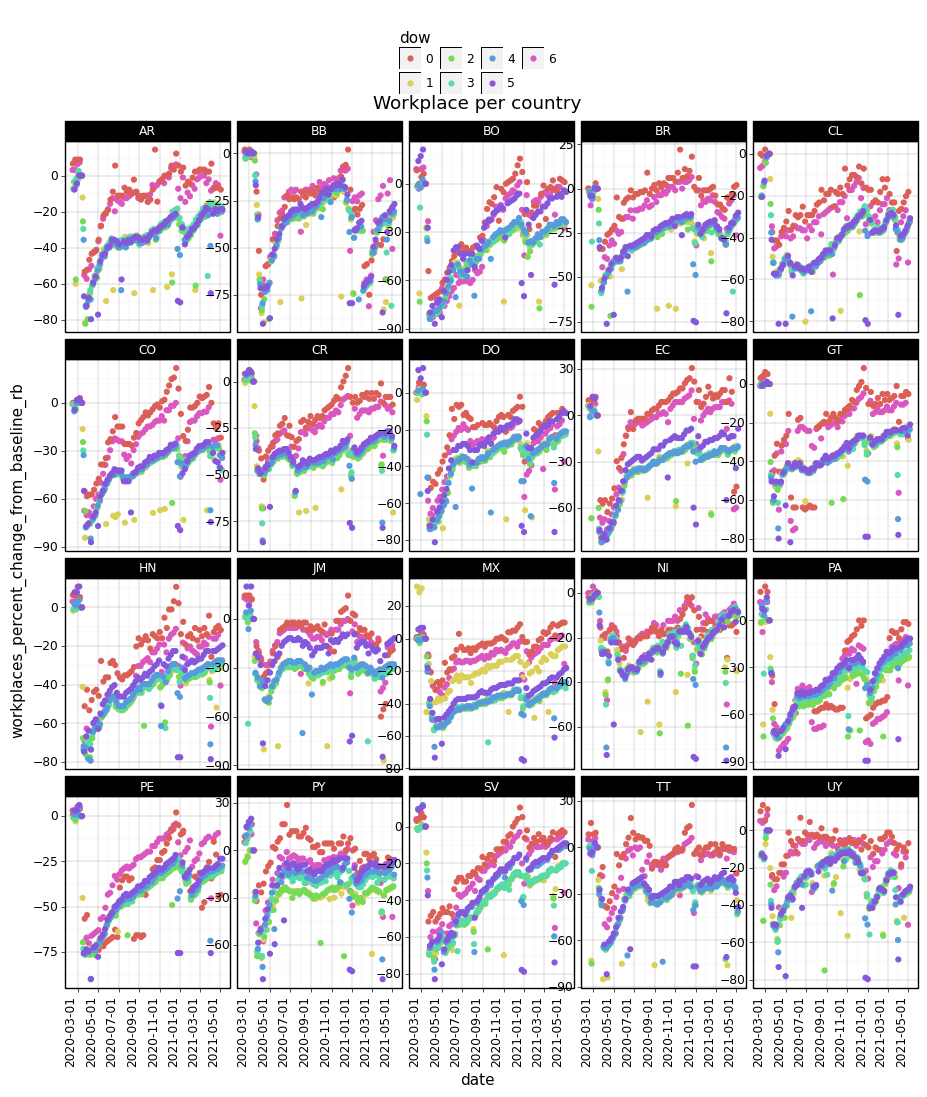

<ggplot: (8772806039973)>


In [77]:
gg1 = (p9.ggplot(df_goo_base, 
           p9.aes(x='dow', y ='workplace_baseline')) 
 + p9.geom_point()
 + p9.facet_wrap('country_region_code', scales='free_y') 
 + p9.labs(title='Workplace per country for base period')
 + p9.theme(figure_size = (11, 11),
            axis_text_x=p9.element_text(rotation=90, hjust=1), 
            legend_position='top')
) 
gg2 = (p9.ggplot(df_goo, 
           p9.aes(x='date', y ='workplaces_percent_change_from_baseline_rb', color = 'dow')) 
 + p9.geom_point()
 + p9.facet_wrap('country_region_code', scales='free_y') 
 + p9.labs(title='Workplace per country')
 + p9.theme(figure_size = (11, 11),
            axis_text_x=p9.element_text(rotation=90, hjust=1), 
            legend_position='top')
) 
print(gg2)

In [ ]:
df_goo[(df_goo.date >= '2020-03-09') & (df_goo.date <= '2020-03-15') & (df_goo.country_region_code == 'AR')]

### Comparison

In [85]:
df = (df_dash \
     .siu_select('region_slug', 'country_name', 'country_iso_code', 'date', 'tcp') 
 >> left_join(_, 
          df_waze \
              .siu_select('country', 'date', 'pc_driven_miles') \
              .siu_rename(country_name='country'), 
              on=['country_name', 'date']) 
 >> left_join(_, 
          df_goo \
              .siu_select('country_region_code', 'date', 
                          'transit_stations_percent_change_from_baseline_rb',
                          'workplaces_percent_change_from_baseline_rb') \
              .siu_rename(country_iso_code='country_region_code',
                          workplace='workplaces_percent_change_from_baseline_rb',
                          transit='transit_stations_percent_change_from_baseline_rb'), 
              on=['country_iso_code', 'date'])
# >> left_join(_, 
#         df_max \
#              .siu_select('date', 'region_slug', 'tcp_clean'),
#              on=['region_slug', 'date'])
 >> gather('measure', 'value', _["tcp", "pc_driven_miles", 'workplace', "transit", 'tcp']) 
)
df.dtypes
df.head(2)

,region_slug,country_name,country_iso_code,date,measure,value
0,country_brazil,Brazil,BR,2020-09-16,tcp,43.918232
1,country_brazil,Brazil,BR,2021-01-20,tcp,37.181214


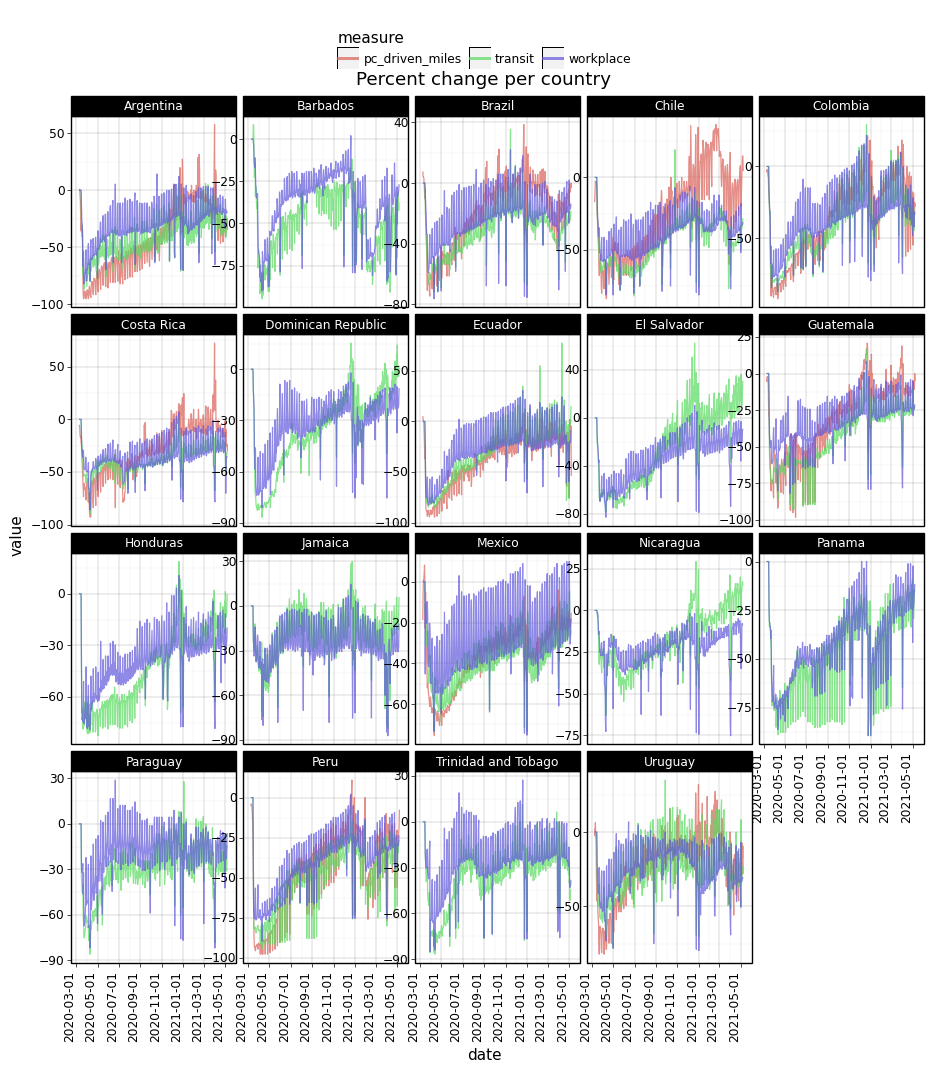

<ggplot: (8772794148177)>

In [84]:
(p9.ggplot(df.siu_filter(_.measure != 'tcp',
                        #_.measure != 'transit',
                         #_.date >= '2020-03-09',
                         #_.date <= '2020-03-16'
                        ), 
           p9.aes(x='date', y ='value', color = 'measure')) 
 + p9.geom_line(alpha = .7)
 + p9.facet_wrap('country_name', scales='free_y') 
 + p9.labs(title='Percent change per country')
 + p9.theme(figure_size = (11, 11),
            axis_text_x=p9.element_text(rotation=90, hjust=1), 
            legend_position='top')
) 

In [88]:
#df.siu_filter(_.country_name=='Mexico', _.measure == 'tcp').head()

In [87]:
df_country = df

### Plots per data source

In [ ]:
df_goo[['date', 'transit_stations_percent_change_from_baseline', 'country_region']] \
    .pivot(index='date', columns='country_region', values='transit_stations_percent_change_from_baseline') \
    .iplot(
    #theme='custom',
    yTitle='% Change',
    title='Google mobility - PC Transit stations'
)

In [ ]:
df_dash[['date', 'tcp', 'region_slug']] \
    .pivot(index='date', columns='region_slug', values='tcp') \
    .iplot(
    #theme='custom',
    yTitle='% Change',
    title='Waze IDB dashboard - TCP'
)

In [ ]:
df_waze[['date', 'pc_driven_miles', 'country']] \
    .pivot(index='date', columns='country', values='pc_driven_miles') \
    .iplot(
    #theme='custom',
    yTitle='% Change',
    title='Waze public - PC driven miles'
)

## City level

### Load data (city level)

In [89]:
cities_names = (pd.read_csv('../docs/city_names_dictionary.csv') 
    >> filter(_.country_iso_code__dash.isnull() == False)
)
cities_names.head(2)

,country_iso_code__dash,country_name__dash,region_slug__dash,region_name__dash,country__waze,city__waze,country_region_code__goo,country_region__goo,sub_region_1__goo,sub_region_2__goo
0,AR,Argentina,buenosaires,Buenos Aires,Argentina,Buenos Aires,AR,Argentina,Buenos Aires,None
1,AR,Argentina,cordoba,Córdoba,NaN,NaN,AR,Argentina,Cordoba,None


#### Waze dashboard

In [90]:
df_dash = pd.read_sql_query("""
select 
    *,
    (date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e')) as date
from spd_sdv_waze_corona.prod_daily_daily_index
where region_type = 'city';
""", conn)

In [91]:
df_dash.shape

(26660, 20)

In [92]:
tab = (df_dash 
 >> group_by('country_iso_code', 'country_name', 'region_slug', 'region_name')
 >> summarize(min_date = _.date.min(),
             max_date = _.date.max(),
             n_obs = _.date.count())
 >> ungroup()
)
tab.to_csv('~/private/projects/dash_mob_city_list.csv')
tab

,country_iso_code,country_name,region_slug,region_name,min_date,max_date,n_obs
0,AR,Argentina,buenosaires,Buenos Aires,2020-03-09,2021-05-12,430
1,AR,Argentina,cordoba,Córdoba,2020-03-09,2021-05-12,430
2,AR,Argentina,rosario,Rosario,2020-03-09,2021-05-12,430
3,BO,Bolivia,santacruzdelasierra,Santa Cruz de la Sierra,2020-03-09,2021-05-12,430
4,BR,Brazil,belem,Belém,2020-03-09,2021-05-12,430
...,...,...,...,...,...,...,...
57,PA,Panama,panamacity,Ciudad de Panamá,2020-03-09,2021-05-12,430
58,PE,Peru,arequipa,Arequipa,2020-03-09,2021-05-12,430
59,PE,Peru,lima,Lima,2020-03-09,2021-05-12,430
60,SV,El Salvador,sansalvador,San Salvador,2020-03-09,2021-05-12,430


In [94]:
print(len(df_dash.region_name.unique())) # Bolivia is missing
df_dash.sort_values('region_name').region_name.unique()
df_dash.sort_values('region_slug').region_slug.unique()

62


array(['aguascalientes', 'arequipa', 'barranquilla', 'belem',
       'belohorizonte', 'bogota', 'brasilia', 'bucaramanga',
       'buenosaires', 'cali', 'campinas', 'cartagena', 'cordoba',
       'cucuta', 'cuenca', 'curitiba', 'fortaleza', 'goiania',
       'guadalajara', 'guatemala', 'guayaquil', 'joaopessoa', 'kingston',
       'leon', 'lima', 'maceio', 'managua', 'manaus', 'medellin',
       'merida', 'mexicocity', 'monterrey', 'montevideo', 'natal',
       'panamacity', 'pereira', 'porto_alergre', 'pueble', 'queretaro',
       'quito', 'recife', 'riodejaneiro', 'rosario', 'salvador',
       'sanjose', 'sanluispotosi', 'sansalvador', 'santacruzdelasierra',
       'santamarta', 'santiago', 'santiagocaballeros', 'santodomingo',
       'santos', 'saojosedoscampos', 'saoluis', 'saopaulo', 'sorocaba',
       'tegucigalpa', 'teresina', 'toluca', 'torreon', 'vitoria'],
      dtype=object)

#### TCP Fixed

In [97]:
#df_max = pd.read_csv("/home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/daily/daily_daily_index_max.csv")
#df_max['exists'] = df_max.region_slug.isin(df_dash.region_slug.unique().tolist()) 
#df_max['date'] = df_max.date.apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d'))
#df_max = df_max.siu_filter(_.exists)

In [98]:
#df_max.head()

#### Waze driven km

In [99]:
df_waze = pd.read_csv("/home/soniame/shared/spd-sdv-omitnik-waze/corona/mobility/Waze _ COVID-19 Impact Dashboard_City-Level Data_Table.csv")
df_waze.sort_values('Country').Country.unique()


array(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'Colombia', 'Costa Rica', 'Czechia', 'Ecuador', 'France',
       'Germany', 'Hungary', 'Indonesia', 'Israel', 'Italy', 'Latvia',
       'Lithuania', 'Malaysia', 'Mexico', 'Netherlands', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania',
       'Singapore', 'Slovakia', 'South Africa', 'Spain', 'Sweden',
       'Ukraine', 'United Kingdom', 'United States', 'Uruguay'],
      dtype=object)

In [110]:
df_waze = pd.read_csv("/home/soniame/shared/spd-sdv-omitnik-waze/corona/mobility/Waze _ COVID-19 Impact Dashboard_City-Level Data_Table.csv")
df_waze.columns = ['date', 'city', 'country', 'pc_driven_miles']
df_waze['date'] = df_waze.date.apply(lambda x : datetime.datetime.strptime(x, '%b %d, %Y'))
df_waze['exists'] = df_waze.country.isin([ 'Argentina','Brazil', 'Chile', 'Colombia', 'Costa Rica',  
                                          'Ecuador', 'Guatemala',  'Mexico',  'Peru', 'Uruguay']) 
df_waze = df_waze.siu_filter(_.exists).siu_mutate(pc_driven_miles=100*(_.pc_driven_miles+1))      

In [111]:
tab = (df_waze 
 >> group_by('country', 'city')
 >> summarize(min_date = _.date.min(),
             max_date = _.date.max(),
             n_obs = _.date.count())
 >> ungroup()
)
tab.to_csv('~/private/projects/waze_mob_city_list.csv')
tab.head()

,country,city,min_date,max_date,n_obs
0,Argentina,Buenos Aires,2020-03-01,2021-05-08,434
1,Brazil,Belo Horizonte,2020-03-01,2021-05-08,434
2,Brazil,Brasilia,2020-03-01,2021-05-08,434
3,Brazil,Curitiba,2020-03-01,2021-05-08,434
4,Brazil,Florianopolis,2020-03-01,2021-05-08,434


In [112]:
print(len(df_waze.city.unique())) # Bolivia is missing
df_waze.sort_values('city').city.unique()

29


array(['Belo Horizonte', 'Bogota', 'Brasilia', 'Buenos Aires', 'Cali',
       'Curitiba', 'Florianopolis', 'Fortaleza', 'Guadalajara',
       'Guarulhos', 'Las Condes', 'Lima', 'Maipu', 'Medellin',
       'Mexico City', 'Monterrey', 'Montevideo', 'Porto Alegre',
       'Puebla City', 'Quito', 'Recife', 'Rio De Janeiro', 'Salvador',
       'San Jose', 'Santiago', 'Santiago De Queretaro', 'Sao Paulo',
       'Vitoria', 'Zapopan'], dtype=object)

In [113]:
df_waze.head(3)

,date,city,country,pc_driven_miles,exists
0,2021-05-08,Cali,Colombia,27.0,True
5,2021-05-08,Quito,Ecuador,51.0,True
8,2021-05-08,Florianopolis,Brazil,52.0,True


Turn baseline from 2020-03-02 to 2020-03-08 per day of week

In [114]:
df_waze = df_waze \
              .siu_select('city', 'country', 'date', 
                          'pc_driven_miles')
df_waze['dow'] = df_waze.date.apply(lambda x : datetime.datetime.strftime(x, '%w'))  
df_waze.head(2)

,city,country,date,pc_driven_miles,dow
0,Cali,Colombia,2021-05-08,27.0,6
5,Quito,Ecuador,2021-05-08,51.0,6


In [115]:
df_waze_base = df_waze[(df_waze.date >= '2020-03-02') & (df_waze.date <= '2020-03-08')] \
    .drop('date', 1) \
    .rename(columns = {'pc_driven_miles':'pc_driven_miles_baseline'})
df_waze_base.head(2)

,city,country,pc_driven_miles_baseline,dow
60289,Vitoria,Brazil,67.0,0
60291,Florianopolis,Brazil,75.0,0


In [116]:
df_waze_rebase = df_waze.merge(df_waze_base)
df_waze_rebase['pc_driven_miles'] = 100*(df_waze_rebase['pc_driven_miles']- df_waze_rebase['pc_driven_miles_baseline'])/df_waze_rebase['pc_driven_miles_baseline']
print(df_waze.shape)
print(df_waze_rebase.shape)
df_waze_rebase.head()
df_waze = df_waze_rebase.drop(['pc_driven_miles_baseline'], 1)

In [118]:
df_waze.head(2)

,city,country,date,pc_driven_miles,dow
0,Cali,Colombia,2021-05-08,-74.528302,6
1,Cali,Colombia,2021-05-01,-87.735849,6


#### Google mobility

In [138]:
df_goo = pd.read_csv("~/shared/spd-sdv-omitnik-waze/corona/mobility/Global_Mobility_Report.csv")  


In [139]:
df_goo['inregion']=df_goo.country_region_code.isin(iso_codes.country_iso_code.to_list())
df_goo['date'] = df_goo.date.apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d'))
df_goo = df_goo \
    .siu_filter(_.inregion) \
    .siu_filter( _.sub_region_1.isnull()==False)#, _.metro_area.isnull())
df_goo.sub_region_2=df_goo.sub_region_2.fillna('None')
df_goo.metro_area=df_goo.metro_area.fillna('None')
print(df_goo.shape)

(1501801, 16)


In [140]:
tab = (df_goo 
 >> group_by('country_region_code', 'country_region', 'sub_region_1', 'sub_region_2', 'metro_area')
 >> summarize(min_date = _.date.min(),
             max_date = _.date.max(),
             n_obs = _.date.count())
 >> ungroup()
)
tab.to_csv('~/private/projects/google_mob_city_list.csv')
tab.head(2)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,min_date,max_date,n_obs
0,AR,Argentina,Buenos Aires,Comuna 1,None,2020-02-15,2021-05-07,448
1,AR,Argentina,Buenos Aires,Comuna 10,None,2020-02-15,2021-05-07,448


In [141]:
df_goo.head(2)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,inregion
8866,AR,Argentina,Buenos Aires,None,None,AR-C,NaN,ChIJu39FBT3KvJURF8D35_z0YOE,2020-02-15,6.0,1.0,6.0,9.0,-2.0,0.0,True
8867,AR,Argentina,Buenos Aires,None,None,AR-C,NaN,ChIJu39FBT3KvJURF8D35_z0YOE,2020-02-16,2.0,-2.0,-15.0,3.0,-9.0,2.0,True


In [142]:
tab.shape

(3857, 8)

In [143]:
df_goo = df_goo \
              .siu_select('country_region_code', 'country_region',
                          'sub_region_1', 'sub_region_2', 
                          'date', 
                          'transit_stations_percent_change_from_baseline',
                          'workplaces_percent_change_from_baseline') \
            .siu_mutate(transit_stations_percent_change_from_baseline = (_.transit_stations_percent_change_from_baseline + 100 ),
                       workplaces_percent_change_from_baseline = (_.workplaces_percent_change_from_baseline + 100 ))      
df_goo['dow'] = df_goo.date.apply(lambda x : datetime.datetime.strftime(x, '%w'))  

In [144]:
df_goo_base = df_goo[(df_goo.date >= '2020-03-09') & (df_goo.date <= '2020-03-15')] \
    .drop('date', 1) \
    .rename(columns = {'transit_stations_percent_change_from_baseline':'transit_baseline',
                      'workplaces_percent_change_from_baseline':'workplace_baseline'})
df_goo_base.head(2)
#df_goo_base[(df_goo_base.country_region_code == 'AR') ]

,country_region_code,country_region,sub_region_1,sub_region_2,transit_baseline,workplace_baseline,dow
8889,AR,Argentina,Buenos Aires,None,121.0,112.0,1
8890,AR,Argentina,Buenos Aires,None,114.0,114.0,2


In [145]:
df_goo_rebase = df_goo.merge(df_goo_base)
df_goo_rebase['transit_stations_percent_change_from_baseline_rb'] = 100*(df_goo_rebase['transit_stations_percent_change_from_baseline']-df_goo_rebase['transit_baseline'])/df_goo_rebase['transit_baseline']
df_goo_rebase['workplaces_percent_change_from_baseline_rb'] = 100*(df_goo_rebase['workplaces_percent_change_from_baseline']- df_goo_rebase['workplace_baseline'])/df_goo_rebase['workplace_baseline']
print(df_goo.shape)
print(df_goo_rebase.shape)
df_goo_rebase.head()
df_goo = df_goo_rebase.drop(['workplace_baseline', 'transit_baseline'], 1)


(1501801, 8)
(1215480, 12)


### Comparison

Comparing all sources per region slug.

In [ ]:
df_goo.head(1)

In [127]:
cities_names.head()

,country_iso_code__dash,country_name__dash,region_slug__dash,region_name__dash,country__waze,city__waze,country_region_code__goo,country_region__goo,sub_region_1__goo,sub_region_2__goo
0,AR,Argentina,buenosaires,Buenos Aires,Argentina,Buenos Aires,AR,Argentina,Buenos Aires,None
1,AR,Argentina,cordoba,Córdoba,NaN,NaN,AR,Argentina,Cordoba,None
2,AR,Argentina,rosario,Rosario,NaN,NaN,NaN,NaN,NaN,NaN
3,BO,Bolivia,santacruzdelasierra,Santa Cruz de la Sierra,NaN,NaN,BO,Bolivia,Santa Cruz Department,None
4,BR,Brazil,belem,Belém,NaN,NaN,BR,Brazil,State of Pará,Belém


In [147]:
df=df_dash \
.siu_select('country_iso_code', 'country_name', 'region_slug', 'region_name', 'date', 'tcp') \
.add_suffix('__dash') \
.merge(cities_names, how='inner') \
.merge(df_waze.add_suffix('__waze'), 
       how='left', 
       left_on=['country__waze','city__waze', 'date__dash'],
       right_on = ['country__waze','city__waze', 'date__waze']) \
.merge(df_goo.add_suffix('__goo'), 
       how='left', 
       left_on=['country_region_code__goo','country_region__goo', 
                'sub_region_1__goo', 'sub_region_2__goo', 'date__dash'],
       right_on =['country_region_code__goo','country_region__goo', 
               'sub_region_1__goo', 'sub_region_2__goo', 'date__goo']) \
.siu_rename(transit__goo='transit_stations_percent_change_from_baseline_rb__goo',
           workplace__goo='workplaces_percent_change_from_baseline_rb__goo') \
.siu_select('country_iso_code__dash', 'country_name__dash', 'region_slug__dash', 
        'date__dash', 'tcp__dash', 'pc_driven_miles__waze',
           'transit__goo', 'workplace__goo') \
.siu_gather('measure', 'value', _["tcp__dash":"workplace__goo"]) 



In [148]:
print(df.shape)

(106640, 6)


In [149]:
print(df_dash.shape)
print(df_waze.shape)
print(df_goo.shape)
print(df.shape)
df.country_iso_code__dash.unique()

(26660, 20)
(12581, 5)
(1215480, 10)
(106640, 6)


array(['AR', 'BR', 'EC', 'DO', 'MX', 'CO', 'PE', 'CL', 'UY', 'GT', 'CR',
       'NI', 'PA', 'HN', 'JM', 'SV', 'BO'], dtype=object)

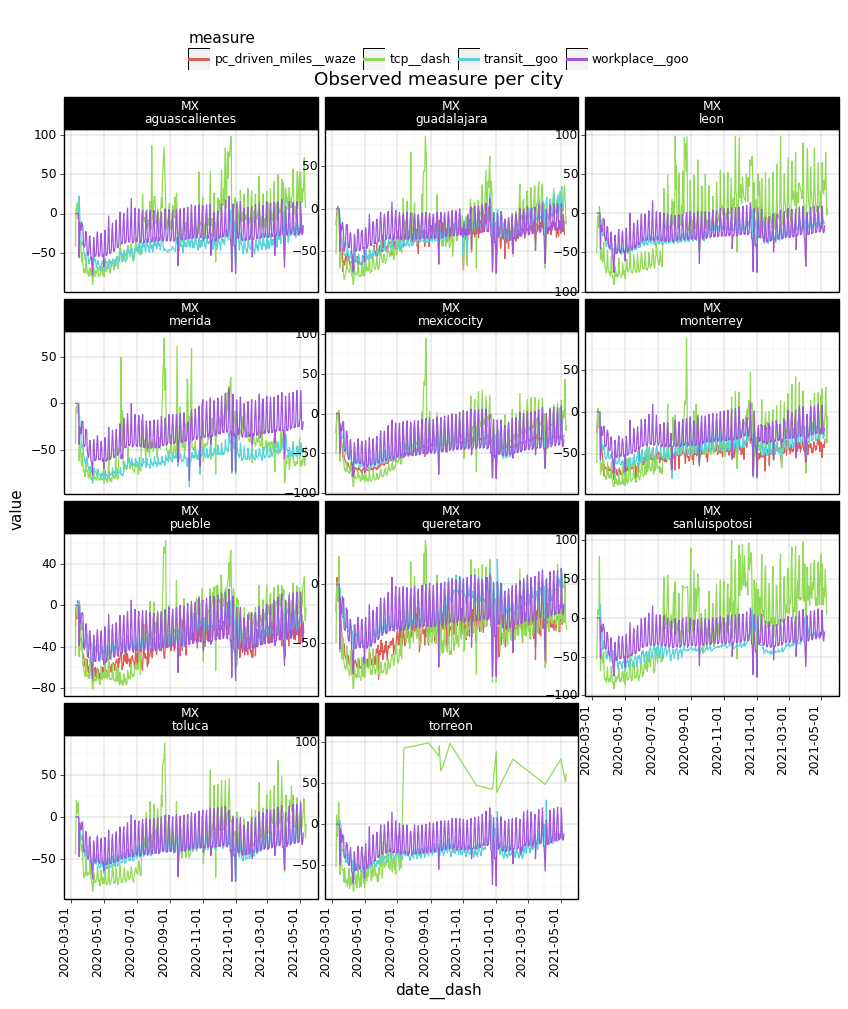

<ggplot: (8772794487013)>

In [150]:
(p9.ggplot(df.siu_filter(_.country_iso_code__dash == 'MX', _.value <100), 
           p9.aes(x='date__dash', y ='value', color = 'measure')) 
 + p9.geom_line()
 + p9.facet_wrap(['country_iso_code__dash', 'region_slug__dash'], scales='free_y', ncol= 3) 
 + p9.theme(figure_size = (10, 10),
            axis_text_x=p9.element_text(rotation=90, hjust=1), 
            legend_position='top')
 + p9.labs(title='Observed measure per city')
) 

In [151]:
df_region=df

#### Rescaled percentage change to common week 2020-03-23

Modified baseline: avergae percentage for the week period from March 23th, 2020 to March 29th, 2020. 

In [ ]:
df_mean = (df
 >> filter(_.date__dash >= '2020-03-23', _.date__dash <= '2020-03-29')
 >> group_by('region_slug__dash', 'measure')
 >> summarize(mean_val = _.value.mean())
 >> ungroup()
)
df_re = (df.merge(df_mean.reset_index(), on=['region_slug__dash', 'measure'], how='left')
 >> mutate(value_rescaled = -100*_.value/_.mean_val)
)
df_re.country_iso_code__dash.unique()

In [ ]:
(p9.ggplot(df_re.siu_filter(_.country_iso_code__dash == 'MX', 
                            #_.region_slug__dash =='mexicocity',
                            #_.value_rescaled < 300,
                            #_.measure!='workplace__goo', _.measure!='transit__goo',
                            # _.date__dash >= '2020-11-01', _.date__dash < '2020-12-01'
                           ), 
           p9.aes(x='date__dash', y ='value_rescaled', color = 'measure')) 
 + p9.geom_line()
 + p9.facet_wrap(['country_iso_code__dash', 'region_slug__dash'], scales='free_y', ncol= 3) 
 + p9.labs(title='Rescaled baseline')
 + p9.theme(figure_size = (10, 10),
            axis_text_x=p9.element_text(rotation=90, hjust=1), 
            legend_position='top')
) 

#### Moving average smoothing

Rolling average with previous seven days.

In [ ]:
df_sao = df_re.siu_filter(_.country_iso_code__dash == 'MX', 
                            #_.region_slug__dash =='riodejaneiro',
                            #_.value_rescaled < 300,
                            #_.measure!='workplace__goo', _.measure!='transit__goo',
                            # _.date__dash >= '2020-11-01', _.date__dash < '2020-12-01'
                           )
#df_sao.head()

In [ ]:
df_ma = (df_sao
 >> arrange('region_slug__dash', 'measure', 'date__dash')
 >> group_by('region_slug__dash', 'measure')
 >> mutate(value_rescaled_ma = _.value_rescaled.rolling(7).mean())
 >> ungroup()
)
df_ma.head()

In [ ]:
(p9.ggplot(df_ma, 
           p9.aes(x='date__dash', y ='value_rescaled_ma', color = 'measure')) 
 + p9.geom_line()
 + p9.facet_wrap(['country_iso_code__dash', 'region_slug__dash'], scales='free_y', ncol= 3)
 + p9.labs(title='Ppercent change smooth')
 + p9.theme(figure_size = (10, 10),
            axis_text_x=p9.element_text(rotation=90, hjust=1), 
            legend_position='top')
) 

In [ ]:
#df.siu_filter(_.region_slug__dash=='arequipa', _.date__dash >= '2020-03-23', _.date__dash <= '2020-03-29').value
#df_mean.siu_filter(_.region_slug__dash=='arequipa')
#df_waze.siu_filter(_.city=='Arequipa', _.date >= '2020-03-23', _.date <= '2020-03-29')

## Country + City

In [164]:
df_union = pd.concat([df_country, 
                     df_region.rename(columns={'country_iso_code__dash':'country_iso_code',
                          'country_name__dash':'country_name',
                          'region_slug__dash':'region_slug',
                          'date__dash':'date'})])
print(df.shape)
df_union.head()

(106640, 6)


,region_slug,country_name,country_iso_code,date,measure,value
0,country_brazil,Brazil,BR,2020-09-16,tcp,43.918232
1,country_brazil,Brazil,BR,2021-01-20,tcp,37.181214
2,country_brazil,Brazil,BR,2020-10-14,tcp,23.651644
3,country_brazil,Brazil,BR,2020-12-09,tcp,46.826141
4,country_brazil,Brazil,BR,2020-04-08,tcp,-58.751967


In [165]:
df_union.measure[df_union.measure == 'pc_driven_miles'] = 'pc_driven_miles__waze'
df_union.measure[df_union.measure == 'tcp'] = 'tcp__dash'
df_union.measure[df_union.measure == 'transit'] = 'transit__goo'
df_union.measure[df_union.measure == 'workplace'] = 'workplace__goo'

In [166]:
df_union.measure.unique()

array(['tcp__dash', 'pc_driven_miles__waze', 'workplace__goo',
       'transit__goo'], dtype=object)

In [174]:
df_union.siu_spread("measure", "value").to_csv("/home/soniame/shared/spd-sdv-omitnik-waze/corona/mobility/region_city_union.csv")


In [36]:
len(df_union.region_slug.unique())

81

In [45]:
#df_union.siu_spread("measure", "value").to_csv("/home/soniame/shared/spd-sdv-omitnik-waze/corona/mobility/region_city_union.csv")
df_union = pd.read_csv("/home/soniame/shared/spd-sdv-omitnik-waze/corona/mobility/region_city_union.csv").drop('Unnamed: 0', axis=1)
df_union.head()

,region_slug,country_name,country_iso_code,date,pc_driven_miles__waze,tcp__dash,transit__goo,workplace__goo
0,aguascalientes,Mexico,MX,2020-03-09,NaN,-42.103947,0.0,0.0
1,aguascalientes,Mexico,MX,2020-03-10,NaN,3.740975,0.0,0.0
2,aguascalientes,Mexico,MX,2020-03-11,NaN,8.477060,0.0,0.0
3,aguascalientes,Mexico,MX,2020-03-12,NaN,13.016856,0.0,0.0
4,aguascalientes,Mexico,MX,2020-03-13,NaN,-6.457111,0.0,0.0


In [46]:
df_union.describe()

,pc_driven_miles__waze,tcp__dash,transit__goo,workplace__goo
count,14479.000000,34830.000000,31641.000000,32308.000000
mean,-35.037156,-33.402549,-35.535579,-29.953664
std,24.820060,49.760181,24.727762,19.990609
min,-98.113208,-99.842676,-100.000000,-91.228070
25%,-52.830189,-67.620328,-51.807229,-41.176471
50%,-33.009709,-40.124244,-35.398230,-29.508197
75%,-16.666667,-11.165761,-20.430108,-17.117117
max,114.925373,1036.781062,119.277108,36.263736


In [47]:
df_mobility = df_union#.siu_spread("measure", "value")
df_mobility['date'] = df_mobility.date.astype(str)

df_max = pd.read_csv("/home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/daily/daily_daily_index_max.csv")
df_max = df_max[['date', 'region_slug', 'tci_observed', 'tcp_observed', 'tci_clean', 'tcp_clean']] \
    .rename(columns = {'tci_clean':'tci_cleaned', 
                       'tcp_clean':'tcp_cleaned'}) 

In [48]:
print(df_max.columns)
print(df_mobility.columns)

Index(['date', 'region_slug', 'tci_observed', 'tcp_observed', 'tci_cleaned',
       'tcp_cleaned'],
      dtype='object')
Index(['region_slug', 'country_name', 'country_iso_code', 'date',
       'pc_driven_miles__waze', 'tcp__dash', 'transit__goo', 'workplace__goo'],
      dtype='object')


In [57]:
df_mobility_clean = df_max.merge(df_mobility, 
                                 how = 'left')
df_mobility_clean.head(2)

,date,region_slug,tci_observed,tcp_observed,tci_cleaned,tcp_cleaned,country_name,country_iso_code,pc_driven_miles__waze,tcp__dash,transit__goo,workplace__goo
0,2020-05-04,aguascalientes,942030,-56.844034,9.420300e+05,-56.844034,Mexico,MX,NaN,-56.844034,-60.000000,-37.931034
1,2020-08-03,aguascalientes,2665362,22.104680,1.594744e+06,-26.942095,Mexico,MX,NaN,22.104680,-33.333333,-17.241379


In [58]:
print(df_union.shape)
print(df_max.shape)
print(df_mobility_clean.shape)

(34830, 8)
(34587, 6)
(34587, 12)


In [68]:
print(sum(df_mobility_clean.pc_driven_miles__waze.isna())/len(df_mobility_clean.tcp__dash))
print(sum(df_mobility_clean.transit__goo.isna())/len(df_mobility_clean.tcp__dash))
print(sum(df_mobility_clean.workplace__goo.isna())/len(df_mobility_clean.tcp__dash))
print(sum(df_mobility_clean.tcp__dash.isna())/len(df_mobility_clean.tcp__dash))
df_mobility_clean.describe()

0.5813745048717727
0.0851765114060196
0.06589180906120796
0.0


,tci_observed,tcp_observed,tci_cleaned,tcp_cleaned,pc_driven_miles__waze,tcp__dash,transit__goo,workplace__goo
count,3.458700e+04,34587.000000,3.458700e+04,34587.000000,14479.000000,34587.000000,31641.000000,32308.000000
mean,3.993469e+07,-33.519965,3.288237e+07,-42.795646,-35.037156,-33.519965,-35.535579,-29.953664
std,1.530090e+08,49.821208,1.150651e+08,38.405227,24.820060,49.821208,24.727762,19.990609
min,1.392000e+03,-99.842676,1.392000e+03,-99.939258,-98.113208,-99.842676,-100.000000,-91.228070
25%,2.249618e+06,-67.784359,1.938169e+06,-69.187378,-52.830189,-67.784359,-51.807229,-41.176471
50%,7.258458e+06,-40.307170,6.324605e+06,-48.614343,-33.009709,-40.307170,-35.398230,-29.508197
75%,2.116527e+07,-11.300803,1.924347e+07,-24.156141,-16.666667,-11.300803,-20.430108,-17.117117
max,3.742041e+09,1036.781062,1.939426e+09,341.732005,114.925373,1036.781062,119.277108,36.263736


In [69]:
df_mobility_clean.to_csv("/home/soniame/private/daily_index_index.csv")

In [75]:
df_mobility_clean[df_mobility_clean.workplace__goo.isna() == False].region_slug.unique()

array(['aguascalientes', 'arequipa', 'barranquilla', 'belem',
       'belohorizonte', 'bogota', 'brasilia', 'bucaramanga',
       'buenosaires', 'cali', 'campinas', 'cartagena', 'cordoba',
       'country_argentina', 'country_barbados', 'country_brazil',
       'country_chile', 'country_colombia', 'country_costa_rica',
       'country_dominican_republic', 'country_ecuador',
       'country_el_salvador', 'country_guatemala', 'country_honduras',
       'country_jamaica', 'country_mexico', 'country_nicaragua',
       'country_panama', 'country_paraguay', 'country_peru',
       'country_trinidad_and_tobago', 'country_uruguay', 'cucuta',
       'cuenca', 'curitiba', 'fortaleza', 'goiania', 'guadalajara',
       'guatemala', 'guayaquil', 'joaopessoa', 'kingston', 'leon', 'lima',
       'maceio', 'managua', 'manaus', 'medellin', 'merida', 'mexicocity',
       'monterrey', 'montevideo', 'natal', 'pereira', 'porto_alergre',
       'pueble', 'queretaro', 'quito', 'recife', 'riodejaneiro',
      

In [76]:
df_mobility_clean[df_mobility_clean.pc_driven_miles__waze.isna() == False].region_slug.unique()

array(['belohorizonte', 'bogota', 'brasilia', 'buenosaires', 'cali',
       'country_argentina', 'country_brazil', 'country_chile',
       'country_colombia', 'country_costa_rica', 'country_ecuador',
       'country_guatemala', 'country_mexico', 'country_peru',
       'country_uruguay', 'curitiba', 'fortaleza', 'guadalajara', 'lima',
       'medellin', 'mexicocity', 'monterrey', 'montevideo',
       'porto_alergre', 'pueble', 'queretaro', 'quito', 'recife',
       'riodejaneiro', 'salvador', 'sanjose', 'santiago', 'saopaulo',
       'vitoria'], dtype=object)